<a href="https://colab.research.google.com/github/marcellinusc/plate-recognition/blob/branch-2/character-recognition-base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Character Recognition with CNN using Extended MNIST Balanced Dataset

##Initialization

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
!git clone https://github.com/marcellinusc/plate-recognition.git

Cloning into 'plate-recognition'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 826 (delta 24), reused 0 (delta 0), pack-reused 772
Receiving objects: 100% (826/826), 123.56 MiB | 11.72 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [3]:
!cd plate-recognition && git checkout branch-2

Checking out files: 100% (676/676), done.
Branch 'branch-2' set up to track remote branch 'branch-2' from 'origin'.
Switched to a new branch 'branch-2'


In [4]:
!pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.2-cp36-none-any.whl size=8032 sha256=62d726194bb56225aa2b666921169b31ffbf7d51929d62b53b2b6024ce72c0cc
  Stored in directory: /root/.cache/pip/wheels/7a/b5/69/3e0757b3086607e95db70661798fdf98a77a0bb79c54e1f320
Successfully built idx2numpy


##Data Preparation

In [5]:
#@title Load EMNIST dataset

import idx2numpy

X_train = idx2numpy.convert_from_file('/content/plate-recognition/dataset/emnist-characters/emnist-balanced-train-images-idx3-ubyte')
y_train = idx2numpy.convert_from_file('/content/plate-recognition/dataset/emnist-characters//emnist-balanced-train-labels-idx1-ubyte')

X_test = idx2numpy.convert_from_file('/content/plate-recognition/dataset/emnist-characters//emnist-balanced-test-images-idx3-ubyte')
y_test = idx2numpy.convert_from_file('/content/plate-recognition/dataset/emnist-characters//emnist-balanced-test-labels-idx1-ubyte')

12


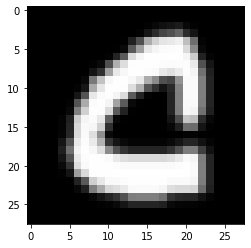

In [6]:
#@title Show image example

import matplotlib.pyplot as plt

i=169
plt.imshow(X_train[i].transpose(),cmap='gray')
print(y_train[i])

In [7]:
#@title Filter dataset to only include numbers and capital letters

import numpy as np

test_X=[]
test_Y=[]

for i in range(0,len(y_test)):
    if 0<=y_test[i]<=35:
        test_X.insert(i,X_test[i].transpose())
        test_Y.insert(i,y_test[i])

test_X=np.array(test_X)
test_Y=np.array(test_Y)

train_X=[]
train_Y=[]

for i in range(0,len(y_train)):
    if 0<=y_train[i]<=35:
        train_X.insert(i,X_train[i].transpose())
        train_Y.insert(i,y_train[i])

train_X=np.array(train_X)
train_Y=np.array(train_Y)

In [8]:
#@title Reshape dataset and one-hot-encode the labels

from tensorflow.keras.utils import to_categorical

train_X = train_X.reshape(-1,28,28,1)
test_X = test_X.reshape(-1,28,28,1)

train_X = train_X.astype('float32')/255
test_X = test_X.astype('float32')/255

train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [9]:
#@title Split 'train' into training set and validation set

from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label=train_test_split(train_X,train_Y_one_hot,test_size=0.2,random_state=13)
print('new training data shape, new validation data shape, new training label shape, new validation label shape:',train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

new training data shape, new validation data shape, new training label shape, new validation label shape: (69120, 28, 28, 1) (17280, 28, 28, 1) (69120, 36) (17280, 36)


##CNN Model

In [10]:
#@title Build CNN for classifying 0-9 and A-Z characters

import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(36,activation='softmax'))

In [11]:
#@title Show model layers

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 36)                4

In [12]:
#@title Train model

batch_size=128
epochs=20

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
              optimizer='adam')
train_result=model.fit(train_X,train_label,
                       batch_size=batch_size,epochs=epochs,verbose=1,
                       validation_data=(valid_X,valid_label))

Epoch 1/20
540/540 [==============================] - 5s 10ms/step - loss: 0.7173 - accuracy: 0.7777 - val_loss: 0.3946 - val_accuracy: 0.8656
Epoch 2/20
540/540 [==============================] - 5s 10ms/step - loss: 0.3415 - accuracy: 0.8804 - val_loss: 0.3245 - val_accuracy: 0.8852
Epoch 3/20
540/540 [==============================] - 5s 10ms/step - loss: 0.2810 - accuracy: 0.8976 - val_loss: 0.2951 - val_accuracy: 0.8940
Epoch 4/20
540/540 [==============================] - 5s 9ms/step - loss: 0.2495 - accuracy: 0.9069 - val_loss: 0.2922 - val_accuracy: 0.8936
Epoch 5/20
540/540 [==============================] - 5s 10ms/step - loss: 0.2255 - accuracy: 0.9140 - val_loss: 0.2928 - val_accuracy: 0.8936
Epoch 6/20
540/540 [==============================] - 5s 9ms/step - loss: 0.2052 - accuracy: 0.9202 - val_loss: 0.2685 - val_accuracy: 0.9019
Epoch 7/20
540/540 [==============================] - 5s 10ms/step - loss: 0.1894 - accuracy: 0.9242 - val_loss: 0.2817 - val_accuracy: 0.8988
E

##Output

In [13]:
#@title Save model as HDF5 binary data format

model.save("plate-recognition/saved-model-base")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: plate-recognition/saved-model-base/assets


In [14]:
#@title Evaluate model using test set

test_eval=model.evaluate(test_X,test_Y_one_hot,verbose=0)
print('Test loss:',test_eval[0])
print('Test accuracy:',test_eval[1])

Test loss: 0.40210604667663574
Test accuracy: 0.898194432258606


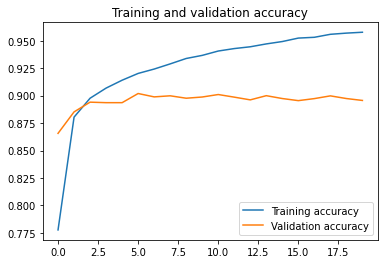

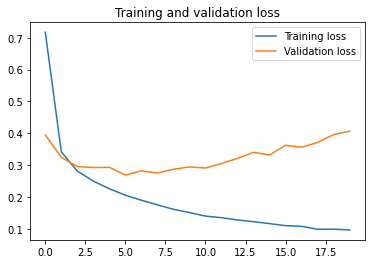

In [15]:
#@title Show model accuracy and loss

accuracy = train_result.history['accuracy']
val_accuracy = train_result.history['val_accuracy']
loss = train_result.history['loss']
val_loss = train_result.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

A


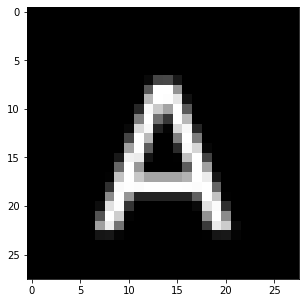

In [16]:
#@title Check model performance

# Test with a new image from outside of EMNIST dataset
from PIL import Image
new_image = Image.open(r"/content/plate-recognition/dataset/test-samples/A.png").convert('L')
new_image = new_image.resize((28,28))
new_image = np.array(new_image)

plt.figure(figsize=[5,5])
new_image = new_image.reshape(-1,28,28,1)
new_image = new_image.astype('float32')

# Make sure that the image contains white letter with black backgrounnd
if np.sum(new_image)/(255*28*28)>0.5:
    new_image = 255-new_image
    
plt.imshow(new_image[0,:,:,0],cmap="gray")
result = np.argmax(model.predict(new_image/255))
if result>=10:
    result = chr(result+55) #convert to ASCII
    
print(result)